In [ ]:
# Paso 1: Instala las bibliotecas necesarias
!pip install fastavro pandas

# Paso 2: Importa las bibliotecas necesarias
import pandas as pd
import fastavro
import json

# Paso 3: Función para leer archivo Avro y convertirlo a DataFrame
def avro_to_dataframe(file_path):
    with open(file_path, 'rb') as f:
        reader = fastavro.reader(f)
        records = [record for record in reader]
    return pd.DataFrame(records)

# Paso 4: Carga el archivo Avro (sube el archivo manualmente en Colab)
from google.colab import files
uploaded = files.upload()

# Paso 5: Convierte el archivo Avro a DataFrame
file_path = list(uploaded.keys())[0]
df = avro_to_dataframe(file_path)

# Paso 6: Guarda el DataFrame como CSV
csv_file_path = file_path.replace('.avro', '.csv')
df.to_csv(csv_file_path, index=False)

# Paso 7: Descarga el archivo CSV
files.download(csv_file_path)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.3 MB/s eta 0:00:00


KeyboardInterrupt: 

# No es AVRO:

In [ ]:
import pandas as pd


In [ ]:
archivo = '/content/p'
df1 = pd.read_csv('/content/p1.csv')
for i in range(2, 21):
  df = pd.read_csv(archivo + str(i) + '.csv')
  df1 = pd.concat([df1, df], axis=0)

In [ ]:
df1

In [ ]:
for i in range(21, 85):
  df = pd.read_csv(archivo + str(i) + '.csv')
  df1 = pd.concat([df1, df], axis=0)

In [ ]:
df1

In [ ]:
df1.to_csv('p.csv', index=False)

# **TFM Jun 17**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Descarga de datos

In [ ]:
df = pd.read_csv('/content/bigx_users_sakai.csv')
df

,tasignaturas,marca_abandono,key_id,tcursos_events_peranalisis,tcursos_events_sum2s,tcursos_events_prom2s,tcursos_events_diff2s,tcursos_events_var2s,tcursos_events_max2s,tcursos_events_min2s,...,tt_login_sem3,tt_login_median3s,tt_login_sum4s,tt_login_prom4s,tt_login_diff4s,tt_login_var4s,tt_login_max4s,tt_login_min4s,tt_login_sem4,tt_login_median4s
0,9,0,PER1520-416-283_1470aabe-2784-4aeb-b92b-a4df36...,7.0,12.0,6.0,2.0,0.400,7.0,5.0,...,73.0,73.0,347.0,86.75,37.0,0.430,123.0,65.0,86.0,79.5
1,4,0,PER1520-416-283_1d1ff527-d0dd-46bb-80e8-0e0415...,7.0,14.0,7.0,0.0,0.000,7.0,7.0,...,36.0,30.0,119.0,29.75,-17.0,-0.486,36.0,18.0,35.0,32.5
2,2,0,PER1520-416-283_224ea337-1a8a-4939-92e9-b89441...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.0,47.0,164.0,41.00,21.0,0.656,53.0,32.0,32.0,39.5
3,9,0,PER1520-416-283_337303e9-49d5-49c6-b62b-44d84a...,6.0,11.0,5.5,1.0,0.200,6.0,5.0,...,12.0,8.0,27.0,6.75,3.0,1.500,12.0,2.0,2.0,6.5
4,9,0,PER1520-416-283_362a0895-a707-4155-ae77-86f371...,6.0,12.0,6.0,0.0,0.000,6.0,6.0,...,49.0,47.0,159.0,39.75,-15.0,-0.385,49.0,24.0,39.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,8,0,PER3561-379-379__379_b56dc7d5-094d-40b6-90ce-1...,7.0,14.0,7.0,0.0,0.000,7.0,7.0,...,14.0,37.0,150.0,37.50,34.0,11.333,96.0,3.0,3.0,25.5
4007,7,0,PER3561-379-379__379_bee9a0ee-081f-4356-bcca-6...,5.0,12.0,6.0,-2.0,-0.286,7.0,5.0,...,17.0,37.0,102.0,25.50,48.0,NaN,48.0,0.0,0.0,37.0
4008,7,0,PER3561-379-379__379_cb4aa675-ebdf-4391-962e-d...,7.0,13.0,6.5,1.0,0.167,7.0,6.0,...,11.0,11.0,34.0,8.50,4.0,1.000,11.0,4.0,4.0,9.5
4009,7,0,PER3561-379-379__379_e4ac35f7-e080-4654-9b9f-f...,6.0,12.0,6.0,0.0,0.000,6.0,6.0,...,20.0,31.0,113.0,28.25,10.0,0.476,41.0,20.0,21.0,26.0


In [ ]:
dfstats = df.describe().T
columnas = dfstats[dfstats['min'] == 0][dfstats['max'] == 0].index
df.drop(columns=columnas).describe().T

NameError: name 'df' is not defined

## Definir valores a trabajar.

Quitar la columna innecesaria key_id, y separar la marca de abandono ('y') de los demás valores ('x').

In [ ]:
df = df.drop(columns='key_id')

## Valores de 'X' y 'Y'

In [ ]:
x = df.drop(columns='marca_abandono')
x

,tasignaturas,tcursos_events_peranalisis,tcursos_events_sum2s,tcursos_events_prom2s,tcursos_events_diff2s,tcursos_events_max2s,tcursos_events_min2s,tcursos_events_sem2,tcursos_events_median2s,tcursos_events_sum3s,...,tt_login_min3s,tt_login_sem3,tt_login_median3s,tt_login_sum4s,tt_login_prom4s,tt_login_diff4s,tt_login_max4s,tt_login_min4s,tt_login_sem4,tt_login_median4s
0,9,7,12,6.0,2,7,5,5,6.0,19,...,65,73,73.0,347,86.75,37,123,65,86,79.5
1,4,7,14,7.0,0,7,7,7,7.0,22,...,18,36,30.0,119,29.75,-17,36,18,35,32.5
2,9,6,11,5.5,1,6,5,5,5.5,17,...,5,12,8.0,27,6.75,3,12,2,2,6.5
3,9,6,12,6.0,0,6,6,6,6.0,18,...,24,49,47.0,159,39.75,-15,49,24,39,43.0
4,8,7,12,6.0,2,7,5,5,6.0,20,...,16,163,16.0,229,57.25,-18,163,16,34,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,8,7,14,7.0,0,7,7,7,7.0,18,...,14,14,37.0,150,37.50,34,96,3,3,25.5
3740,7,5,12,6.0,-2,7,5,7,6.0,18,...,17,17,37.0,102,25.50,48,48,0,0,37.0
3741,7,7,13,6.5,1,7,6,6,6.5,19,...,8,11,11.0,34,8.50,4,11,4,4,9.5
3742,7,6,12,6.0,0,6,6,6,6.0,16,...,20,20,31.0,113,28.25,10,41,20,21,26.0


In [ ]:
y = df['marca_abandono']
y

0       0
1       0
2       0
3       0
4       1
       ..
3739    0
3740    0
3741    0
3742    0
3743    0
Name: marca_abandono, Length: 3744, dtype: int64

In [ ]:
pd.DataFrame(x).describe().T
min_cero = pd.DataFrame(x).describe().T[pd.DataFrame(x).describe().T['min'] == 0]
minmaxcero = min_cero[min_cero['max'] == 0]
print('Las variables que tienen valor minimo y valor máximo iguales a cero son:')
# for i in list(minmaxcero.index):
#   print(i, end=', ')
print(f'número de varibles iguales a 0: {len(list(minmaxcero.index))}')
xx = x.drop(columns=list(minmaxcero.index))
opc = input('¿Desea eliminar las variables iguales a cero? (s/n)').lower()
if opc == 's':
  x = xx
xx.shape

## Standardscaler.

Se normalizan los datos de x.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x_norm = StandardScaler().fit_transform(x)
x_norm

array([[ 0.60933274,  0.86654946,  0.29295202, ...,  0.63842421,
         0.61933665,  0.30797905],
       [-1.15313773,  0.86654946,  0.84439112, ..., -0.06416263,
         0.02807608, -0.11597656],
       [ 0.60933274,  0.3432654 ,  0.01723247, ..., -0.30334113,
        -0.35450428, -0.3505052 ],
       ...,
       [-0.09565545,  0.86654946,  0.56867157, ..., -0.27344382,
        -0.33131759, -0.3234442 ],
       [-0.09565545,  0.3432654 ,  0.29295202, ..., -0.03426532,
        -0.13423074, -0.17460872],
       [-0.80064364, -1.22658678, -1.08564572, ..., -0.33323845,
        -0.35450428, -0.03930374]])

In [ ]:
x_norm.shape

(3744, 1101)

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_entrena, x_test, y_entrena, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'TAMAÑOS:\nx de entrenamiento = {x_entrena.shape}.\ny de entrenamiento = {y_entrena.shape}')

TAMAÑOS:
x de entrenamiento = (2995, 577).
y de entrenamiento = (2995,)


## Análisis de componentes principales

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=5)#int((x_entrena.shape[1]-1)/2))
pca.fit(x_entrena)

PCA(n_components=5)

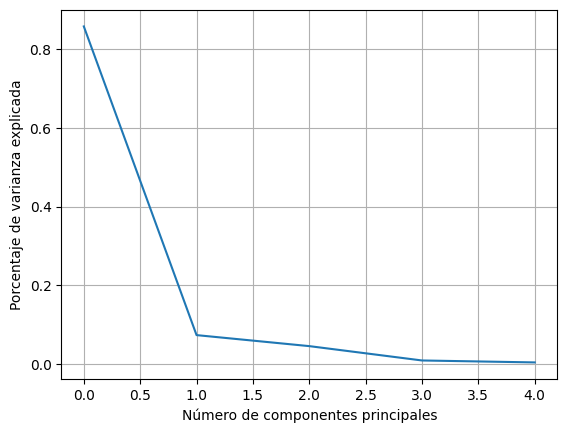

In [ ]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.grid()
plt.xlabel('Número de componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.show()

In [ ]:
x_entrenamiento_final = pca.transform(x_entrena)
x_evaluacion_final = pca.transform(x_test)


In [ ]:
print(f'VERIFICACIÓN DE TAMAÑOS:')
print(f'x de entrenamiento = {x_entrenamiento_final.shape}.')
print(f'y de entrenamiento = {y_entrena.shape}')
print(f'x de evaluación = {x_evaluacion_final.shape}.')
print(f'y de evaluación = {y_test.shape}')


VERIFICACIÓN DE TAMAÑOS:
x de entrenamiento = (2995, 577).
y de entrenamiento = (2995,)
x de evaluación = (749, 577).
y de evaluación = (749,)


In [ ]:
x_entrena = x_entrenamiento_final
x_test = x_evaluacion_final

## Lista de algoritmos:

- logistic regression
- Decision tree
- Cluster por kmeans
- Redes neuronales
- Naive bayes
- KNN
- SVM
- Linear regresion


In [ ]:
algoritmos = ['logistic regression',
              'Decision tree',
              'Cluster por kmeans',
              'Redes neuronales',
              'Naive bayes',
              'KNN',
              'SVM',
              'Linear regresion']

etiquetas = ['Prueba', 'accuracy_score', 'roc']
resultados = {}
pruebas = {}

# resultados[etiquetas[k]] = j
# pruebas[algoritmos[j]] = resultados[etiquetas[k]]


In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(x_entrena, y_entrena)
y_predict = logistic.predict(x_test)
print('Realizando regresión logistica se obtiene una precisión de:')
print("SCORE PCA: ", logistic.score(x_evaluacion_final, y_test))
print(accuracy_score(y_test, y_predict))


Realizando regresión logistica se obtiene una precisión de:
SCORE PCA:  0.45660881174899864
0.45660881174899864


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# metricas:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

## Con árbol de decisión.

Realizando árbol de decisión se obtiene una precisión de:
max_depth, acuracy_score, roc_auc
1, 0.8718291054739653, 0.5
2, 0.8718291054739653, 0.5
3, 0.8718291054739653, 0.5
4, 0.8731642189586115, 0.5052083333333334
5, 0.8691588785046729, 0.5029112429811129
6, 0.8678237650200267, 0.5110308192955589
7, 0.8544726301735648, 0.5122591245533434
8, 0.8544726301735648, 0.5033738514548238
9, 0.855807743658211, 0.5219100944359367
10, 0.8210947930574098, 0.5108872511485452
11, 0.8317757009345794, 0.5170128254211332
12, 0.822429906542056, 0.5338661306789177
13, 0.822429906542056, 0.5338661306789177
14, 0.8104138851802403, 0.5225322230729964
15, 0.8144192256341789, 0.5648130423685555
16, 0.8050734312416555, 0.5416826186830016
17, 0.8010680907877169, 0.5349428917815212
18, 0.807743658210948, 0.5343287391526289
19, 0.7970627503337784, 0.5370884379785604


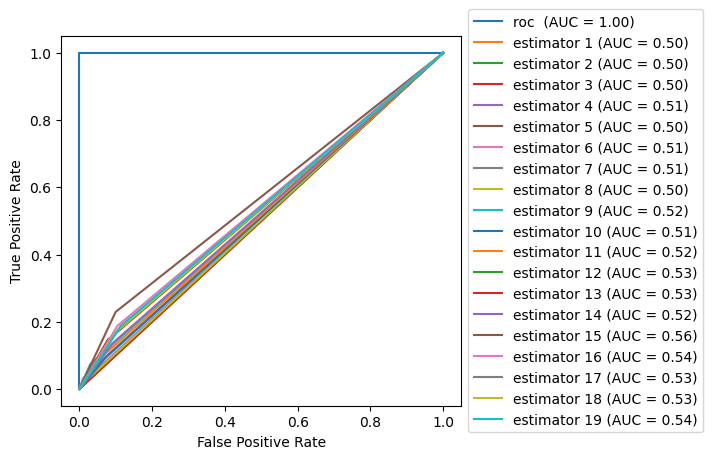

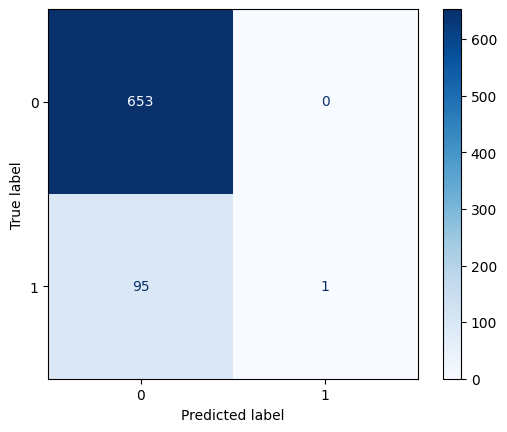

In [ ]:
from sklearn import tree
print('Realizando árbol de decisión se obtiene una precisión de:')
plt.figure()
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test)
roc_auc = metrics.auc(fpr, tpr)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='roc ').plot(ax=plt.gca())
print('max_depth, acuracy_score, roc_auc')
acu = [0]  #*****************
for i in range(1, 20):
  clf = tree.DecisionTreeClassifier(max_depth=i,criterion='log_loss')
  clf = clf.fit(x_entrena, y_entrena)
  y_predict = clf.predict(x_test)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
  roc_auc = metrics.auc(fpr, tpr)
  metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='estimator '+str(i)).plot(ax=plt.gca())
  acu.append(accuracy_score(y_test, y_predict))  #****************
  print(f'{i}, {accuracy_score(y_test, y_predict)}, {roc_auc}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.75)
plt.show()
# MATRIZ DE CONFUSIÓN.
mejor = acu.index(max(acu))  #**********
classifier = tree.DecisionTreeClassifier(max_depth=mejor,criterion='log_loss').fit(x_entrena, y_entrena)
disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        x_evaluacion_final,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        # normalize=normalize,
    );



- Algoritmo árbol de decisión: Con max_depth entre 1 y 3 se obtiene acuracy de 0,8718.

### Curva ROC.

y_test  vrs.  y_predict

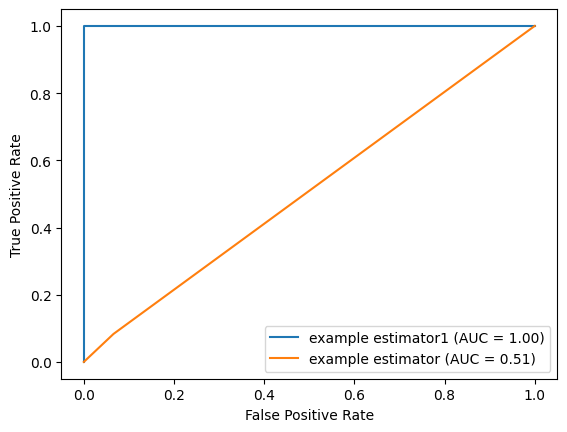

In [ ]:
plt.figure()
fpr, tpr, thresholds = metrics.roc_curve(y_predict, y_predict)
roc_auc = metrics.auc(fpr, tpr)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator1').plot(ax=plt.gca())
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator').plot(ax=plt.gca())
# display.plot()
#display.plot(label='ROC curve (area = %0.2f)' % roc_auc)
#plt.legend()
plt.show()

## Cluster por kmeans

In [ ]:
from sklearn.cluster import KMeans

Realizando clustering por k medias (kmeans) se obtiene una precisión de:
max_depth, acuracy_score, roc_auc
1, 0.8718291054739653, 0.5
2, 0.8651535380507344, 0.5006141526288923
3, 0.8170894526034713, 0.5042432363450741
4, 0.7690253671562083, 0.4959721158754466
5, 0.6141522029372497, 0.43824974476773865
6, 0.24299065420560748, 0.5403187212863706


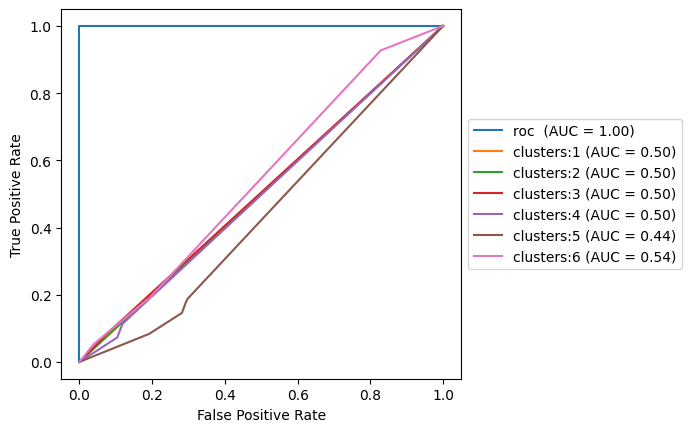

In [ ]:
print('Realizando clustering por k medias (kmeans) se obtiene una precisión de:')
plt.figure()
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test)
roc_auc = metrics.auc(fpr, tpr)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='roc ').plot(ax=plt.gca())
print('max_depth, acuracy_score, roc_auc')
acu = [0]  #*****************
for i in range(1, 7):
  estim = KMeans(n_clusters=i, verbose=0, n_init=10)
  estim.fit(x_entrena)
  y_predict = estim.predict(x_test)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
  roc_auc = metrics.auc(fpr, tpr)
  metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='clusters:'+str(i)).plot(ax=plt.gca())
  acu.append(accuracy_score(y_test, y_predict))  #****************
  print(f'{i}, {accuracy_score(y_test, y_predict)}, {roc_auc}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.75)
plt.show()


## Redes neuronales

Realizando redes neuronales por MLPClassifier con hidden_layer_sizes=(4, 2) se obtiene una precisión de:
acuracy_score, roc_auc


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.6902536715620827, 0.4447342394078611


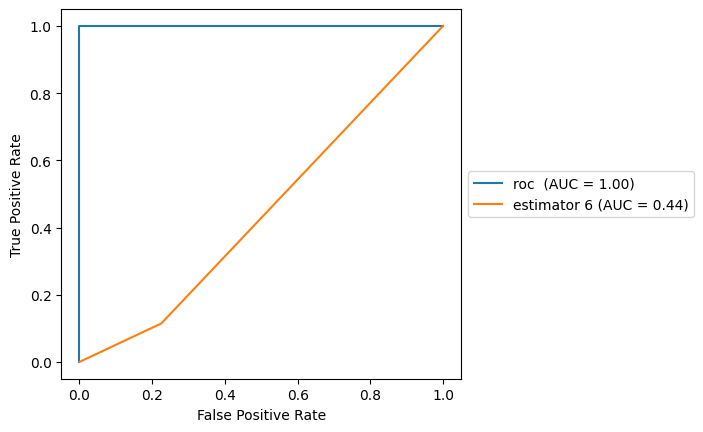

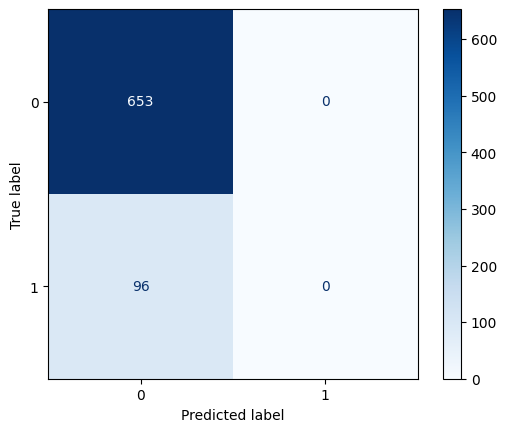

In [ ]:
from sklearn.neural_network import MLPClassifier
print('Realizando redes neuronales por MLPClassifier con hidden_layer_sizes=(4, 2) se obtiene una precisión de:')
plt.figure()
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test)
roc_auc = metrics.auc(fpr, tpr)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='roc ').plot(ax=plt.gca())
print('acuracy_score, roc_auc')
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(4, 2), random_state=1)

clf.fit(x_entrena, y_entrena)
y_predict = clf.predict(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                estimator_name='estimator '+str(i)).plot(ax=plt.gca())
print(f'{accuracy_score(y_test, y_predict)}, {roc_auc}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.75)
plt.show()
# MATRIZ DE CONFUSIÓN.
mejor = acu.index(max(acu))  #**********
classifier = tree.DecisionTreeClassifier(max_depth=mejor,criterion='log_loss').fit(x_entrena, y_entrena)
disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        x_evaluacion_final,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        # normalize=normalize,
    );


In [ ]:
opc = input('Pasando por una primera etapa de árbol de decisión y una segunda etapa de MLPClassifier, se obtien').lower()
if opc == 'e':
  print('max_depth, acuracy_score, roc_auc')
  y_p = pd.DataFrame()
  for i in range(2, 22):
    clf = tree.DecisionTreeClassifier(max_depth=i,criterion='log_loss')
    clf = clf.fit(x_entrena, y_entrena)
    y_predict = clf.predict(x_entrena)
    y_p = pd.concat([y_p, pd.DataFrame(y_predict)], axis=1)
#    fpr, tpr, thresholds = metrics.roc_curve(y_entrena, y_predict)
#    roc_auc = metrics.auc(fpr, tpr)
#    print(f'{i}  ->   {accuracy_score(y_entrena, y_predict)} -> {roc_auc}')

# y_p -> es x de entrada a MLPClas...

mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10, 5), random_state=1)

mlpc.fit(y_p, y_entrena)
#******
y_p = pd.DataFrame()
for i in range(2, 22):
  y_predict = clf.predict(x_test)
  y_p = pd.concat([y_p, pd.DataFrame(y_predict)], axis=1)

y_predict_total = mlpc.predict(y_p)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_total)
roc_auc = metrics.auc(fpr, tpr)
print(f'{accuracy_score(y_test, y_predict_total)}, {roc_auc}')

Pasando por una primera etapa de árbol de decisión y una segunda etapa de MLPClassifier, se obtiene
max_depth, acuracy_score, roc_auc
0.8184245660881175, 0.5137984941296581


## Naive bayes

Realizando Naive Bayes se obtiene una precisión de:
acuracy_score, roc_auc
0.8718291054739653, 0.5


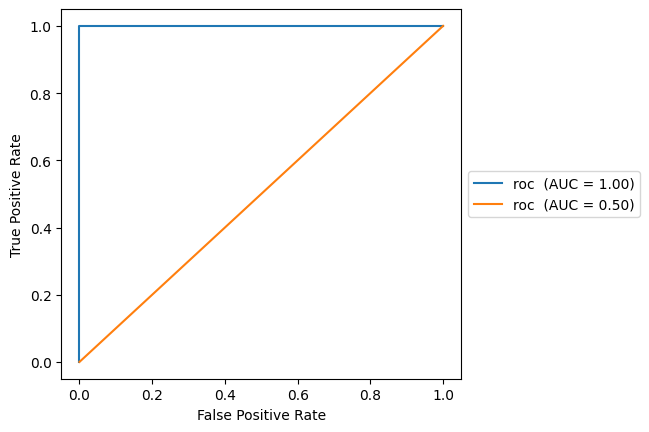

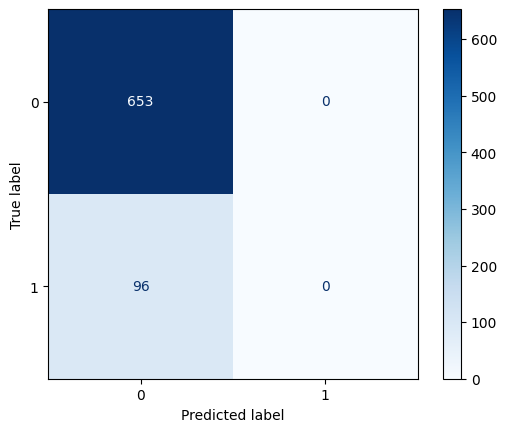

In [ ]:
from sklearn.naive_bayes import BernoulliNB

print('Realizando Naive Bayes se obtiene una precisión de:')
plt.figure()
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test)
roc_auc = metrics.auc(fpr, tpr)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='roc ').plot(ax=plt.gca())
print('acuracy_score, roc_auc')

gnb = BernoulliNB()
gnb.fit(x_entrena, y_entrena)
y_predict = gnb.predict(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='roc ').plot(ax=plt.gca())
print(f'{accuracy_score(y_test, y_predict)}, {roc_auc}')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.75)
plt.show()
# MATRIZ DE CONFUSIÓN.
mejor = acu.index(max(acu))  #**********
classifier = BernoulliNB().fit(x_entrena, y_entrena)
disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        x_evaluacion_final,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        # normalize=normalize,
    );


## KNN

1  ->   0.7797062750333779 -> 0.47826537774374683
2  ->   0.8544726301735648 -> 0.498931214905564
3  ->   0.8371161548731643 -> 0.5111903394589077
4  ->   0.8664886515353805 -> 0.5013798494129659
5  ->   0.8598130841121495 -> 0.4975513654925983
6  ->   0.8704939919893191 -> 0.4992343032159265
7  ->   0.8678237650200267 -> 0.49770290964777947
8  ->   0.8718291054739653 -> 0.5
9  ->   0.8704939919893191 -> 0.4992343032159265
10  ->   0.8704939919893191 -> 0.4992343032159265
11  ->   0.8704939919893191 -> 0.4992343032159265
12  ->   0.8718291054739653 -> 0.5
13  ->   0.8718291054739653 -> 0.5
14  ->   0.8718291054739653 -> 0.5
15  ->   0.8718291054739653 -> 0.5
16  ->   0.8718291054739653 -> 0.5
17  ->   0.8718291054739653 -> 0.5
18  ->   0.8718291054739653 -> 0.5
19  ->   0.8718291054739653 -> 0.5


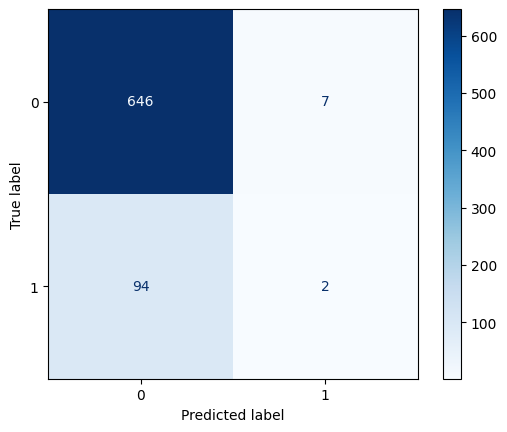

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_entrena, y_entrena)
  y_predict = knn.predict(x_test)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
  roc_auc = metrics.auc(fpr, tpr)
  print(f'{i}  ->   {accuracy_score(y_test, y_predict)} -> {roc_auc}')

# MATRIZ DE CONFUSIÓN.
mejor = 6  #**********
classifier = tree.DecisionTreeClassifier(max_depth=mejor,criterion='log_loss').fit(x_entrena, y_entrena)
disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        x_evaluacion_final,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        # normalize=normalize,
    );



## SVM

No se implementa por su costo computacional.

In [ ]:
"""

from sklearn import svm

for i in range(1, 20):
  clf = svm.SVC(kernel='linear', C=i)
  clf.fit(x_entrena, y_entrena)
  y_predict = clf.predict(x_test)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
  roc_auc = metrics.auc(fpr, tpr)
  print(f'{i}  ->   {accuracy_score(y_test, y_predict)} -> {roc_auc}')

"""
''

''

## Linear regresion

In [ ]:
from sklearn import linear_model


reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
reg.fit(x_entrena, y_entrena)
y_predict = clf.predict(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
print(f'{1}  ->   {accuracy_score(y_test, y_predict)} -> {roc_auc}')

1  ->   0.8251001335113485 -> 0.5131843415007658


## Ejemplo ROC

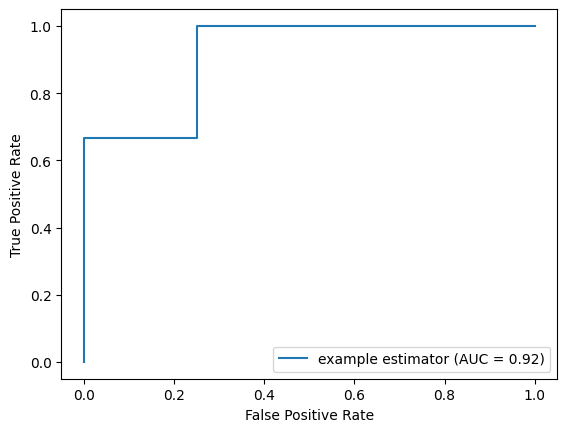

In [ ]:
y1 = pd.Series([0, 1, 0, 0, 1, 1, 0])
y2 = pd.Series([3.2, 4, 2.2, 2.3, 3.3, 3.1, 2.3])

fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot();


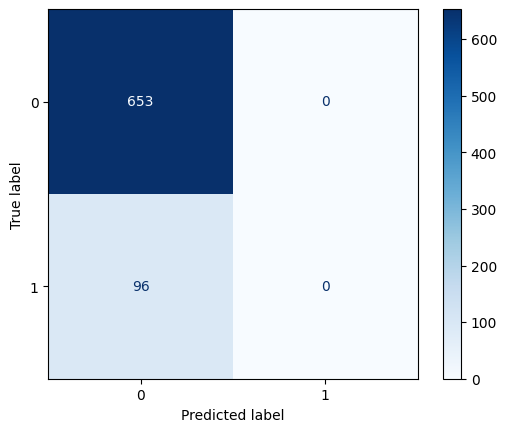

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

classifier = tree.DecisionTreeClassifier(max_depth=3,criterion='log_loss').fit(x_entrena, y_entrena)
disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        x_evaluacion_final,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        # normalize=normalize,
    );

In [ ]:
# Arbol decisión max_depth = 1-3:
i = 2
clf = tree.DecisionTreeClassifier(max_depth=i,criterion='log_loss')
clf = clf.fit(x_entrena, y_entrena)
y_predict = clf.predict(x_test)